# 2D Linear Advection Equation with FTUS Scheme

\begin{align*}
\frac{\partial u}{\partial t} = -U \frac{\partial u}{\partial x} - V \frac{\partial u}{\partial y}
\end{align*}
with the following initial condition
$$
u(x, y, 0) = \sin{(\omega_x x)}\sin{(\omega_y y)}
$$
with $U > 0$ & $V > 0$.

This can be discretised as,
$$
u_{i,j}^{n+1} = u_{i,j}^n - U \frac{\Delta t}{\Delta x} \left ( u_{i,j}^n - u_{i-1,j}^n \right) - V \frac{\Delta t}{\Delta y}\left ( u_{i,j}^n - u_{i,j-1}^n \right)
$$


Stability: $\text{Cr}_x + \text{Cr}_y \le 1$

In [46]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
from matplotlib import cm 

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['animation.html'] = 'jshtml'

In [47]:
nx = 33
ny = 33
Lx = 1.0
Ly = 1.0

# create coordinates
x = np.linspace(0, Lx, nx)
dx = x[1] - x[0]
y = np.linspace(0, Ly, ny)
dy = y[1] - y[0]
# create the 2D grid

xx, yy = np.meshgrid(x, y)

# define initial condition
wx = 2.0*np.pi
wy = 2.0*np.pi
u0 = lambda x, y: np.sin(wx*x)*np.sin(wy*y)

# plt.contourf(xx, yy, u0(xx, yy))
# plt.colorbar()

In [48]:
U = 1.0
V = 1.0 

dt = 1.0/(abs(U)/dx + abs(V)/dy)
dt *= 0.95

t = 0.0
tend = 2.0

# Courant numbers
Crx = U * dt/dx
Cry = V * dt/dy 

# setup the solution arrays 
sol = []
u = np.zeros([ny + 2, nx + 2])
u[1:-1, 1:-1] = u0(xx, yy)

# Periodic boundary conditions
u[1:-1, 0] = u[1:-1, -2] 
u[1:-1, -1] = u[1:-1, 1]
u[0, 1:-1] = u[-2, 1:-1]
u[-1, 1:-1] = u[1, 1:-1]

sol.append(u)

In [49]:
interior = (slice(1,-1), slice(1,-1))
while t < tend:
    un = sol[-1]
    unew = un.copy() 
    unew[interior]  = un[interior] - Crx * (un[interior] - un[1:-1, :-2]) - Cry * (un[interior] - un[:-2, 1:-1])

    unew[1:-1, 0] = unew[1:-1, -2] 
    unew[1:-1, -1] = unew[1:-1, 1]
    unew[0, 1:-1] = unew[-2, 1:-1]
    unew[-1, 1:-1] = unew[1, 1:-1]

    sol.append(unew)
    t += dt

C:\Users\Nehemiah\AppData\Local\Temp\ipykernel_6840\3378934162.py:10: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  ims.append(im.collections)


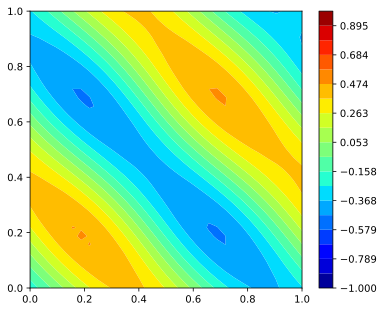

In [50]:
fig = plt.figure(figsize=(6.1, 5), facecolor='w')
ims = []
levs = np.linspace(-1, 1, 20)
i = 0
t = 0.0

for solution in sol:
    if (i%1 == 0):
        im = plt.contourf(xx, yy, solution[interior], cmap=cm.jet, levels=levs, vmax=1.0, vmin=-1.0)
        ims.append(im.collections)

    i += 1
    t += dt 

cbar = plt.colorbar()

ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True, repeat_delay=1000)
ani